# TinWidgets Tests
`__version__ : '0.1.0'`


In [1]:
import sys
sys.path.append('..')
import tinwidgets as tinw
import importlib

importlib.reload(tinw)
if tinw.__version__ != '0.1.0':
    raise Exception('tinwidgets version is not 0.1.0, it is', tinw.__version__)
else:
    print('tinwidgets version is 0.1.0, proceeding...')

tinwidgets version is 0.1.0, proceeding...


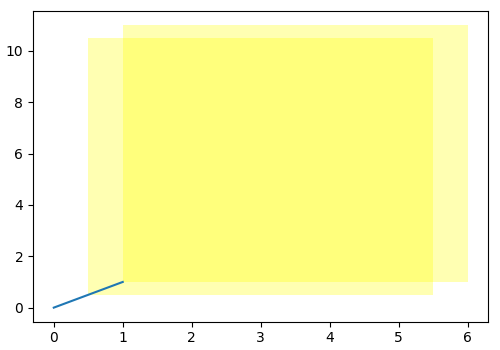

In [2]:
''' 
This is the basic test to check if the package is working correctly.
Nothing is changed from the last demo in 0.0.0_tests.ipynb, execpt 
dividing the code into modules.
'''
from test_utils import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

%matplotlib widget
importlib.reload(tinw)

import tinwidgets as tinw
# prepare_env()

with plt.ioff():
    fig, ax = plt.subplots()

x = np.linspace(0,5,30)
y = np.sin(x)
rect = Rectangle([0.5, 0.5], 5, 10, alpha=.3,
                color = 'yellow', lw = 0)
rect1 = Rectangle([1, 1], 5, 10, alpha=.3,
                color = 'yellow', lw = 0)
line = Line2D([0,1], [0,1])
rect.set_picker(5)
rect1.set_picker(5)
line.set_picker(5)

# adds the line to the axs objects
# when calling ax.draw() the line 
# is drawn
# NOTE: if line.animated is true then 
# ax.draw() will not draw the line,
# the updates are handled manually
ax.add_artist(rect)
ax.add_artist(rect1)
ax.add_line(line)
ax.relim()
ax.autoscale_view()
fig.tight_layout()
fig.set_size_inches(5,3.5)
fig.canvas.draw()

bg = fig.canvas.copy_from_bbox(ax.bbox)
fig.canvas.blit(ax.bbox)

fig.canvas.mpl_connect('pick_event', tinw.on_pick)
fig.canvas.mpl_connect('motion_notify_event', tinw.on_move)
fig.canvas.mpl_connect('button_release_event', tinw.on_release)
fig.canvas.mpl_connect('figure_leave_event', tinw.on_release)
fig.canvas.mpl_connect('draw_event', tinw.on_draw)

fig.show()

In [13]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import test_utils

test_utils.prepare_env()

fig, ax = tinw.subplots()
x = np.linspace(0,5,30)
y = np.sin(x)
rect = Rectangle([0.5, 0.5], 5, 10, alpha=.3,
                color = 'yellow', lw = 0)
rect1 = Rectangle([1, 1], 2, 5, alpha=.3,
                color = 'yellow', lw = 0)
line = Line2D([0,1], [0,1])
rect.set_picker(5)
rect1.set_picker(5)
line.set_picker(5)

# adds the line to the axs objects
# when calling ax.draw() the line 
# is drawn
# NOTE: if line.animated is true then 
# ax.draw() will not draw the line,
# the updates are handled manually
ax.add_artist(rect)
ax.add_artist(rect1)
ax.add_line(line)
ax.relim()
ax.autoscale_view()
fig.tight_layout()
fig.set_size_inches(5,3.5)
fig.canvas.draw()

bg = fig.canvas.copy_from_bbox(ax.bbox)
fig.canvas.blit(ax.bbox)

fig.canvas.mpl_connect('pick_event', tinw.on_pick)
fig.canvas.mpl_connect('motion_notify_event', tinw.on_move)
fig.canvas.mpl_connect('button_release_event', tinw.on_release)
fig.canvas.mpl_connect('figure_leave_event', tinw.on_release)
fig.canvas.mpl_connect('draw_event', tinw.on_draw)

# interactive 
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)


# ___ WIDGETS ___
out = widgets.Output()
out.append_stdout('stdout:\n')
out.append_stdout(fig.get_dpi())
slider = widgets.FloatSlider(
    value=7,
    min=0,
    max=5,
    step=.1,
    description='Left:',
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)
right_box = widgets.VBox([slider, out])
app = widgets.HBox([fig.canvas, right_box])
slider.value = 2
tinw.link_to_widget(rect, slider)
app

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
tinw.widget_handler.show_logs()

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

In [7]:
import ipywidgets as widgets
from IPython.display import display

a = widgets.IntSlider(value=5, min=0, max=10)

def f1(a):
    display(a)
    
def f2(a):
    display(a * 2)
    
out1 = widgets.interactive_output(f1, {'a': a})
out2 = widgets.interactive_output(f2, {'a': a})

display(a)
display(out1)
display(out2)

IntSlider(value=5, max=10)

Output()

Output()

In [ ]:
''''''